In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR,ARResults
from pmdarima.arima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
df = pd.read_csv('../datasets/cvid.csv')

In [3]:
df.head()

,cve_ent,poblacion,nombre,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,26-10-2020,27-10-2020,28-10-2020,29-10-2020,30-10-2020,31-10-2020,01-11-2020,02-11-2020,03-11-2020,04-11-2020
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,139,136,93,59,70,37,21,30,0,2
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,153,96,58,45,36,25,9,31,34,16
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,111,91,70,60,57,32,20,53,34,0
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,28,13,18,6,15,1,0,3,1,1
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,8,9,5,7,2,1,1,3,3,0


In [4]:
df =  df.T

In [5]:
dT = df.index[3:]

In [6]:
df = pd.DataFrame(df, index= dT)

In [7]:
df.columns = ['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR','CAMPECHE','CHIAPAS', 'CHIHUAHUA','DISTRITO FEDERAL','COAHUILA','COLIMA', 'DURANGO','GUANAJUATO', 'GUERRERO','HIDALGO','JALISCO','MEXICO','MICHOACAN','MORELOS',
            'NAYARIT','NUEVO LEON','OAXACA','PUEBLA','QUERETARO','QUINTANA ROO'
        ,'SAN LUIS POTOSI'
                ,'SINALOA'
                 ,'SONORA'
                ,'TABASCO'
             ,'TAMAULIPAS'
               ,'TLAXCALA'
               ,'VERACRUZ'
                ,'YUCATAN'
              ,'ZACATECAS'
               ,'Nacional']

In [8]:
df.head()

,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,DURANGO,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
12-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Ploteando Datos Nacionales

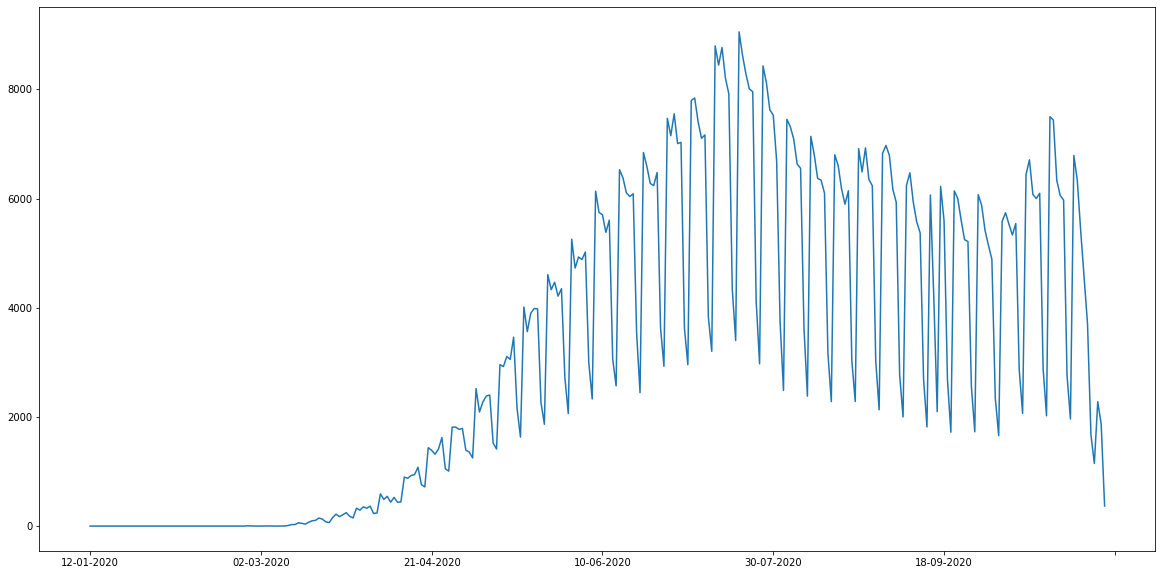

In [9]:
df.Nacional.plot(figsize=(20,10))

# Modelo 1: Holt Winters

In [11]:
df_nac = df[['Nacional']]
df_nac.index = pd.to_datetime(df_nac.index, dayfirst=True)

In [12]:
df_nac.index.freq = 'd'
df_nac.index

DatetimeIndex(['2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19',
               '2020-01-20', '2020-01-21',
               ...
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31', '2020-11-01', '2020-11-02',
               '2020-11-03', '2020-11-04'],
              dtype='datetime64[ns]', length=298, freq='D')

In [13]:
df_nac.isna().sum()

Nacional    0
dtype: int64

In [14]:
#Efecto de tendencia additivo
span = 12
alpha = 2/(span+1)
df_nac['EWMA'] = df_nac['Nacional'].ewm(alpha=alpha,
                                        adjust=False).mean()

<ipython-input-14-9f2c4121bffc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nac['EWMA'] = df_nac['Nacional'].ewm(alpha=alpha,


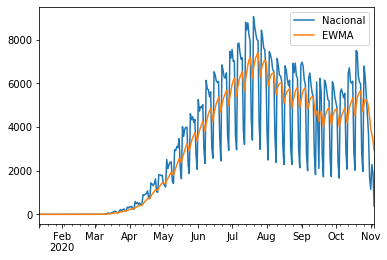

In [15]:
df_nac.plot()

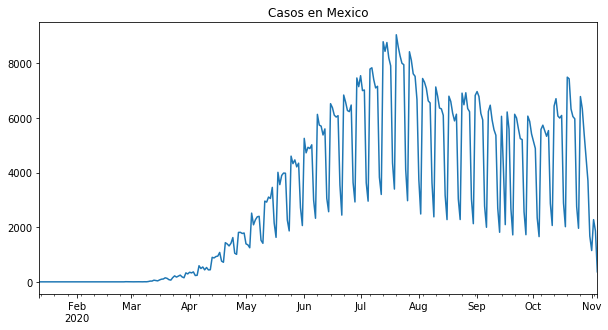

In [22]:
df_nac.Nacional.plot(figsize=(10,5))
plt.title('Casos en Mexico')
plt.show()

# Auto arima

In [23]:
import itertools as it
import operator

In [24]:
acom = list(it.accumulate(df_nac['Nacional']))

In [26]:
df_nac['Acomulados'] = list(it.accumulate(df_nac['Nacional']))

<ipython-input-26-2eb27268f5e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nac['Acomulados'] = list(it.accumulate(df_nac['Nacional']))


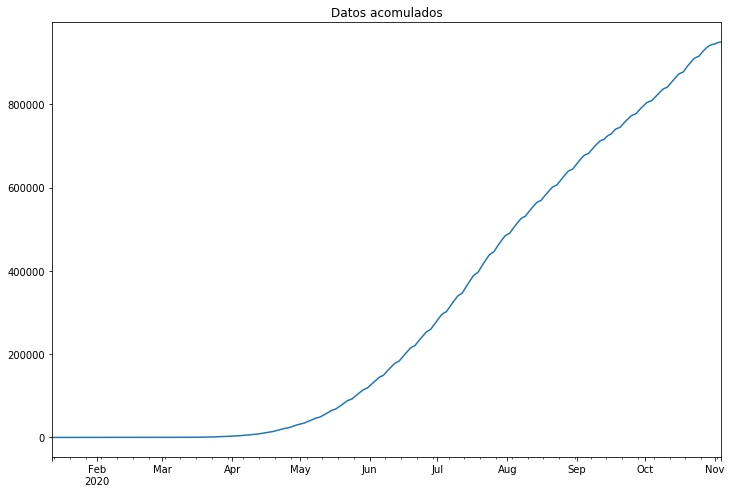

In [29]:
df_nac.Acomulados.plot(figsize=(12,8))
plt.title('Datos acomulados')
plt.show()

In [31]:
model_auto = auto_arima(df_nac.Acomulados,
                       m = 5,
                       max_order=None, max_p=7, max_q=7,
                       max_d=2, max_P=4, max_Q=4, max_D=2,
                       maxiter=50, alpha=0.05, information_criterion='aic')

In [32]:
model_auto

ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(1, 2, 0, 5),
      with_intercept=False)

In [33]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  298
Model:             SARIMAX(2, 1, 2)x(1, 2, [], 5)   Log Likelihood               -2524.112
Date:                            Fri, 18 Dec 2020   AIC                           5060.225
Time:                                    14:25:06   BIC                           5082.181
Sample:                                         0   HQIC                          5069.025
                                            - 298                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2611      0.011    115.677      0.000       1.240       1.282
ar.L2         -0.9911      0.011    -94.198      0.000      -1.012      -0.970
ma.L1         -1.4420      0.029    -49.352      0.000      -1.499      -1.385
ma.L2          0.8538      0.027     32.123      0.000       0.802       0.906
ar.S.L5       -0.8484      0.026    -32.353      0.000      -0.900      -0.797
sigma2      2.522e+06   1.69e+05     14.964      0.000    2.19e+06    2.85e+06
===================================================================================
Ljung-Box (Q):                     1355.63   Jarque-Bera (JB):                51.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             206.34   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.7e+14. Standard errors may be unstable.
"""

In [34]:
df_nac.head(1)

,Nacional,EWMA,Acomulados
2020-01-12,0,0.0,0


In [35]:
df_nac.tail(1)

,Nacional,EWMA,Acomulados
2020-11-04,367,2926.084425,949197


In [38]:
d = pd.to_datetime('11-04-2020')
d

Timestamp('2020-11-04 00:00:00')

In [40]:
date_ = d + pd.to_timedelta(np.arange(20), 'D')

In [41]:
date_

DatetimeIndex(['2020-11-04', '2020-11-05', '2020-11-06', '2020-11-07',
               '2020-11-08', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-14', '2020-11-15',
               '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23'],
              dtype='datetime64[ns]', freq=None)

In [42]:
pred = model_auto.predict(len(date_))

In [43]:
dfTest = pd.Series(pred, index=date_)
dfTest.head()

2020-11-04    957113.060193
2020-11-05    960079.753504
2020-11-06    957822.155210
2020-11-07    953938.685732
2020-11-08    950171.135335
dtype: float64

In [44]:
df_auto_pred = pd.DataFrame({'Prediccion': pred}, index=date_)

In [45]:
df_auto_pred.head()

,Prediccion
2020-11-04,957113.060193
2020-11-05,960079.753504
2020-11-06,957822.155210
2020-11-07,953938.685732
2020-11-08,950171.135335


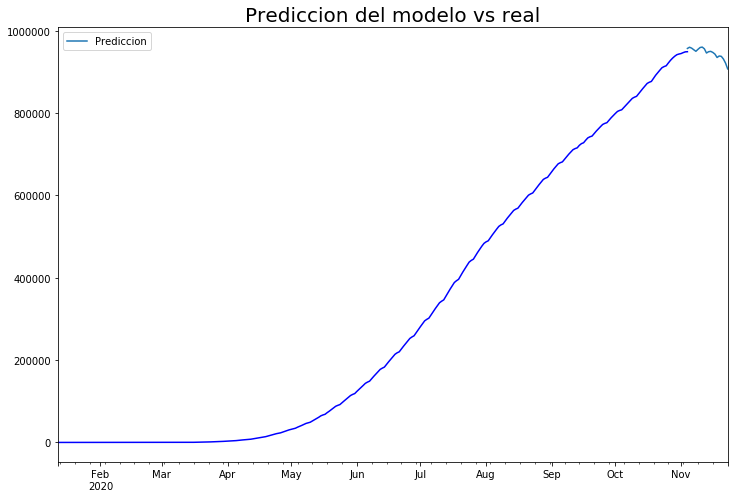

In [49]:
df_auto_pred.plot(figsize=(12,8))
df_nac.Acomulados.plot(color = 'blue')
plt.title('Prediccion del modelo vs real', size = 20)
plt.show()